<a href="https://colab.research.google.com/github/ArelyA/CE888_2020_Data-Science/blob/master/CE888_Lab8_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/sagihaider/CE888_2020.git

Cloning into 'CE888_2020'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 25162 (delta 36), reused 4 (delta 0), pack-reused 25082
Receiving objects: 100% (25162/25162), 562.19 MiB | 49.85 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [3]:
import os
import shutil
from keras import layers
from keras import models
from keras import optimizers
from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator
os.environ['KAGGLE_USERNAME'] = "arelya" # username from the json file
os.environ['KAGGLE_KEY'] = "e276ea403eb01cd7fef5f90fdbcf34db" # key from the json file

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

In [4]:
# Upload data
from zipfile import ZipFile
file_name = "/content/CE888_2020/Lab_8/data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
#Brain MRI Images for Brain Tumor Detection
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection # api copied from kaggle

 60% 9.00M/15.1M [00:00<00:00, 31.4MB/s]
100% 15.1M/15.1M [00:00<00:00, 43.3MB/s]


In [6]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
data_dir_list = os.listdir('/content')
print(data_dir_list)
print(os.listdir('/content/no'))
print(os.listdir('/content/yes'))

['.config', 'brain_tumor_dataset', 'brain-mri-images-for-brain-tumor-detection.zip', 'data', 'CE888_2020', 'no', 'yes', 'sample_data']
['no 91.jpeg', 'no 7.jpeg', '3 no.jpg', 'no 100.jpg', '1 no.jpeg', '27 no.jpg', 'no 1.jpg', 'no 10.jpg', '34 no.jpg', '28 no.jpg', '19 no.jpg', 'no 94.jpg', '29 no.jpg', '12 no.jpg', 'N21.jpg', '32 no.jpg', 'no 99.jpg', 'No16.jpg', 'No14.jpg', 'No11.jpg', 'No19.jpg', 'no 923.jpg', 'no 2.jpg', 'No13.jpg', '23 no.jpg', '10 no.jpg', '50 no.jpg', '38 no.jpg', 'no.jpg', '5 no.jpg', '13 no.jpg', '49 no.jpg', '25 no.jpg', 'no 89.jpg', 'no 3.jpg', '7 no.jpg', 'no 96.jpg', 'N16.jpg', 'No17.jpg', '36 no.jpg', '6 no.jpg', 'N15.jpg', '47 no.jpg', '22 no.jpg', '20 no.jpg', '42 no.jpg', 'no 98.jpg', 'N6.jpg', 'no 6.jpg', '21 no.jpg', '30 no.jpg', '18 no.jpg', '40 no.jpg', 'N19.JPG', '8 no.jpg', 'no 9.png', '26 no.jpg', 'no 92.jpg', 'no 97.jpg', 'N26.JPG', 'No12.jpg', 'no 4.jpg', 'no 8.jpg', '15 no.jpg', '9 no.jpg', 'No21.jpg', '44no.jpg', '17 no.jpg', 'N11.jpg', 'No1

Install packages tensorflow 1.3.0 and keras 2.0.7

In [1]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

     |████████████████████████████████| 43.6MB 70kB/s 
     |████████████████████████████████| 1.6MB 48.4MB/s 
     |████████████████████████████████| 890kB 53.2MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=c74ddac88c46049b2630eba4e565bc4dd2560399c505f22423685215f2af7a2b
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.3
    Uninstalling bleach-3.1.3:
      Successfully uninstalled bleach-3.1.3
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1
     |████████████████████████████████| 276kB 38.4MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.7 which is incompa

In [0]:
import numpy as np
import os
import time
from CE888_2020.Lab_8.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [17]:
img_path = '/content/yes/Y70.jpg' # image name
img = image.load_img(img_path, target_size=(224, 224)) # load image
x = image.img_to_array(img) # convert image to array
print (x.shape)
x = np.expand_dims(x, axis=0) # expand dimension
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [0]:
#%% Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/brain_tumor_dataset'
data_dir_list = os.listdir(data_path)

In [23]:
print(data_dir_list)

['no', 'yes']


In [24]:
img_data_list=[] # created an empty list for images to be loaded

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		if img.endswith((".jpg")):
			img_path = data_path + '/'+ dataset + '/'+ img
			img = image.load_img(img_path, target_size=(224, 224))
			x = image.img_to_array(img)
			x = np.expand_dims(x, axis=0)
			x = preprocess_input(x)
#			x = x/255
			# print('Input image shape:', x.shape)
			img_data_list.append(x)

#%% 
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

Loaded the images of dataset-no

Loaded the images of dataset-yes

(171, 1, 224, 224, 3)
(1, 171, 224, 224, 3)
(171, 224, 224, 3)


In [25]:
no = 0
yes = 0

for dataset in data_dir_list:
  img_list=os.listdir(data_path+'/'+ dataset)
  print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
  for img in img_list:
    if img.endswith((".jpg")):
      if "no" in img:
        no += 1
      else:
        yes += 1

print(no, "no")
print(yes, "yes")
print(no+yes, "Total")

Loaded the images of dataset-no

Loaded the images of dataset-yes

65 no
106 yes
171 Total


In [28]:
# Define the number of classes
num_classes = 2
print(img_data.shape[0])
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:65]=0
labels[66:]=1

names = ['no','yes']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


171


In [29]:
image_input = Input(shape=(224, 224, 3)) # shape of a single image

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet') # load VGG-16 model with 'top = true'
model.summary()

552779776/553467096 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (M

In [30]:
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [31]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable
custom_vgg_model.summary()

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [32]:
t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 136 samples, validate on 35 samples
Epoch 1/2
136/136 [==============================] - 243s - loss: 2.0674 - acc: 0.5441 - val_loss: 0.6895 - val_acc: 0.6857
Epoch 2/2
136/136 [==============================] - 242s - loss: 0.8319 - acc: 0.6618 - val_loss: 0.8892 - val_acc: 0.6571
Training time: -486.2158055305481
35/35 [==============================] - 50s    
[INFO] loss=0.8892, accuracy: 65.7143%


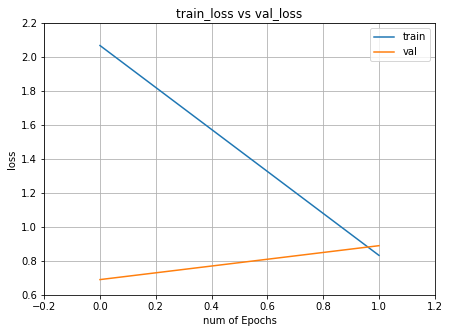

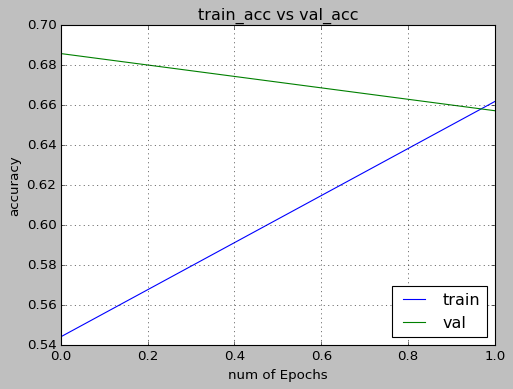

In [33]:
#%% plot
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(2)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])